# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Введение. Общая информация о выборке 

Проводится анализ рынка недвижимости Санкт-Петербурга и Ленинградской области на основании выборки из почти 23700 значений.
В таблице имеются данные о местонахождении, картографических и индивидуальных параметрах жилья, его стоимости и времени продажи. Будет проанализирован процесс формирования конечной стоимости в зависимости от различных параметров(общая площадь, тип квартиры, расстояние от центра города и т.д.). Кроме этого, изучим как меняется скорость продаж. 

Проверим содержимое выборки - файл содержит 22 характеристики выборки из почти 23700 значений. В качестве id объекта используются порядковые номера строк. Выведем первые 10 строк таблицы. 

In [93]:
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt
import datetime as dt
# импортируем данные в датафрейм и выведем краткую информацию
try:
    data = pd.read_csv('C:\\practicum\\real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [94]:
data.head(10) # выведем первые 10 строк исходной выборки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

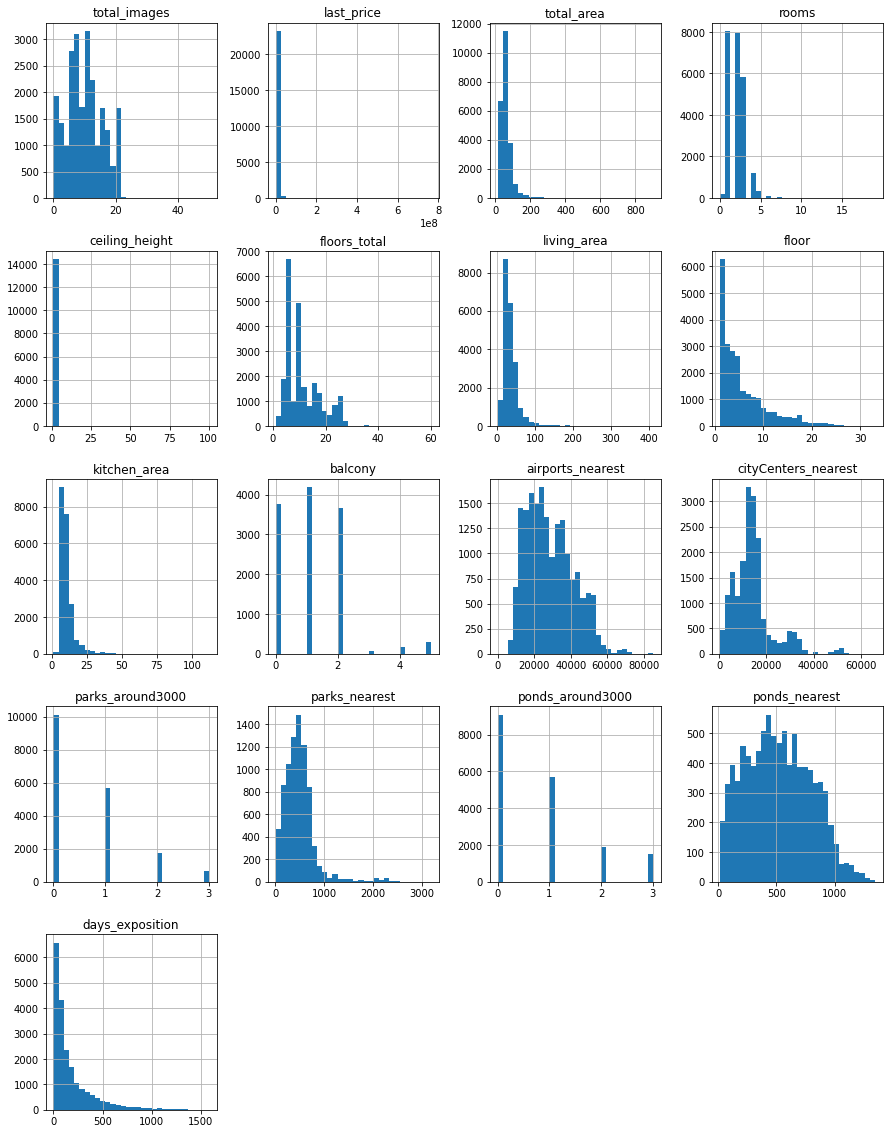

In [95]:
data.hist(figsize = (15, 20), bins = 30) # общая статистика всех параметров таблицы

## Предобработка данных

### Общий анализ пропусков
Проверим наличие пропусков в данных. Они имеются среди следующих столбцов: ceiling_height(высота потолков), floors_total(количество этажей в доме), living_area(жилая площадь), is_apartment(аппартаменты),  kitchen_area(площадь кухни), balcony(число балконов), locality_name(населенный пункт), airports_nearest(расстояние до аэропорта), cityCenters_nearest(до центра города), parks_around3000(парки в 3 км), ponds_around3000(водоёмы в 3 км), ponds_nearest(до ближайшего водоёма),  days_exposition(время размещения до снятия)

In [96]:
data.isna().sum() # проверим количество пропусков в разных столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Простое заполнение пропусков
Начнём заполнять пропуски начиная с очевидных - отсутствие значений в столбцах с информацией о ближайших парках и водоёмах, балконах говорит об их отстутствии, поэтому может быть заполнено 0. Изначально данные в этих столбцах имели тип float, заменим его на int, так как все эти характеристики дискретные

In [97]:
columns_to_replace=['balcony','parks_around3000','ponds_around3000'] #заполняем пропуски в трёх столбцах и меняем в них тип данных на int
for col in columns_to_replace:
    data[col] = data[col].fillna(0)
    data[col] = data[col].astype('int')

Кроме этого, будем считать, что отсутствие значения в столбце is_apartment - является ли помещение апартаментами по умолчанию равно False. Данные в столбце поменяем из строки на тип bool

In [98]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna(False)

### Столбец floors_total
Количество этажей в доме в случае пропуска примем равным этажу, на котором находится объект недвижимости. Также переведём этот столбец в целые числа. Пропуски здесь могут объясняться потерей данных, либо тем, что этот параметр при заполнении карточки объекта необязателен

In [99]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'floor']
data['floors_total'] = data['floors_total'].astype('int')

### Преобразование locality_name
Некоторые пропущенные расстояния можно заполнить используя усредненные значения для каждого населённого пункта. Для этого нужно сначала обработать данные столбца locality_name - удалить пропуски и неявные дубликаты. В этом столбце есть 49 пропущенных значений. Возможно это связано с тем, что населенного пункта не было в выпадающем меню, либо произошёл сбой в службах геолокации.

In [100]:
data['locality_name'] = data['locality_name'].astype('str') # меняем тип данных на строковый и выводим уникальные значения
data['locality_name'].sort_values().unique()

array(['nan', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской

Чтобы автоматизировать поиск неявных дубликатов, создадим новый столбец с названиями населенных пунктов. Так как опечатки и расхождения чаще происходят не из самого названия, а из типа населённого пункта - поселок/посёлок и т.д., удалим их все, оставив только топонимы. Для этого введём вспомогательную функцию создания коротких названий

In [101]:
bad_word = ['посёлок', 'поселок','коттеджный', 'городского', 'типа', 'городской', 'при', 'железнодорожной','станции', 'село', 'деревня', 'садовое', 'товарищество', 'садоводческое', 'некоммерческое']
# функция для создания вспомогательного столбца с короткими названиями населенных пунктов без типа
def short_name(local_name):
    local_name_list = local_name.split()
    for word in bad_word:
        if word in local_name_list:
            local_name_list.remove(word)
    new_name = ' '.join(local_name_list)
    if new_name != local_name:
        return new_name
    else: 
        return local_name

В таблице остались пропуски, где nan записан как строка. Таких значений всего 49,  заменим их на 'unknown'

In [102]:
data.loc[data['locality_name'] == 'nan', 'locality_name'] = 'unknown'

In [103]:
data['short_locality_name'] = data['locality_name'].apply(short_name) 
data['short_locality_name'].sort_values().unique() # выведем уникальные значения после удаления неявных дубликатов

array(['unknown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород

### Столбец last_price
В этом столбце нет пропусков, но его нужно изучить на наличие выбросов. В выборке имеется большое количество элитной недвижимости со стоимостью на порядки отличающейся от средней. Оставим для анализа только квартиры дешевле 30 млн рублей 

<AxesSubplot:>

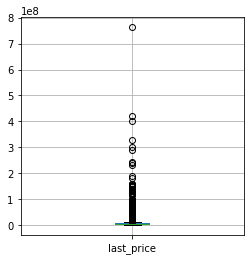

In [104]:
data['last_price'].plot(kind = 'box', figsize = (4,4), grid = True) # статистические характеристики цены на недвижимость

In [105]:
data_midclass = data.query('last_price <30000000') # создаём новый датасет для анализа недвижимости среднего рынка

### Столбцы rooms, kitchen_area, living_area

Эти столбцы непосредственно связаны друг с другом, поэтому проанализируем их совместно. Для начала изучим статистику медианных значений в зависимости от количества комнат в квартире и наличие пропусков в данных по ним. Параметры площадей заполняются пользователем вручную, поэтому служат серьёзным источником пропущенных и некорректных данных

In [106]:
data_midclass.pivot_table(index = 'rooms', values = ['total_area', 'kitchen_area', 'living_area'], aggfunc = ['median','count'])

median                               count                       
      kitchen_area living_area total_area kitchen_area living_area total_area
rooms                                                                        
0              NaN       18.00     26.025            0         183        196
1             9.01       17.60     36.500         7209        7384       8042
2             8.70       30.50     53.000         7267        7280       7918
3             9.40       44.90     72.300         5287        5274       5713
4            10.90       62.50     96.450         1016        1023       1108
5            14.00       88.05    133.000          233         240        265
6            16.90      114.80    167.750           68          71         76
7            17.00      130.50    196.500           33          34         36
8            22.60      155.00    229.000            5           7          7
9            13.20      179.20    271.100            5           5          6
10           19.30      153.65    244.350            2           2          2
11           13.30      138.80    183.700            1           1          1
14           21.25      195.15    304.200            2           2          2
16           13.00      180.00    270.000            1           1          1

В выборке присутствуют квартиры и, вероятно, коттеджи с большим количеством комнат. Это также элитная недвижимость либо ошибки в данных. Удалим все объекты более 6 комнат.

In [107]:
data_midclass = data_midclass.query('rooms <=6')

Отдельно рассмотрим студии. Пропущенные значения для площади кухни заменим на 0, а жилую площадь - на общую. Те студии, где количество комнат указано 0, заменим на 1.

In [108]:
#заменям 0комнатные квартиры на 1
data_midclass.loc[data_midclass['rooms'] == 0, 'rooms'] = 1
#проставляем 0 в кухни студий
data_midclass.loc[(data_midclass['kitchen_area'].isna()) & (data_midclass['studio'] == True), 'kitchen_area'] = 0  
#заполняем пропуски жилой площади студий общей площадью
data_midclass.loc[(data['living_area'].isna()) & (data_midclass['studio'] == True), 'living_area'] = data_midclass.loc[(data['living_area'].isna()) & (data_midclass['studio'] == True), 'total_area']     

Изучим выбросы данных. Для каждого типа квартир отбросим квартиры, где общая площадь явно превышает разумные пределы для рынка стандартной недвижимости 

<AxesSubplot:>

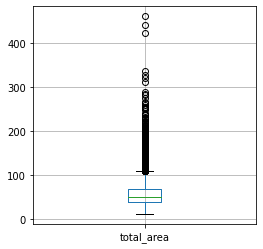

In [109]:
data_midclass['total_area'].plot(kind = 'box', figsize = (4,4), grid = True) #статистические характеристики общей площади жилья

In [110]:
# Обрезаем данные, удаляя слишком большие квартиры
data_midclass = data_midclass.query('(rooms == 0 and total_area<70) or (rooms == 1 and total_area<80) or (rooms == 2 and total_area<100) or (rooms == 3 and total_area<150) or (rooms == 4 and total_area<200) or (rooms == 5 and total_area<250) or (rooms == 6 and total_area<300)')

Пропуски в столбце kitchen_area могут быть случайными, а могут обозначать, что выделенной кухни в квартире нет(европланировка), поэтому их заполнять не будем, чтобы не искажать статистику.
Пропуски в столбце living_area также оставим незаполненными, так как среди квартир есть недвижимость свободной и нестандартной планировки и заполнять их усреднёнными значениями будет ошибочно 

Теперь изучим эти столбцы на предмет выбросов значений

<AxesSubplot:>

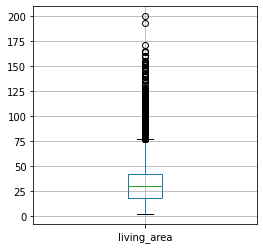

In [111]:
data_midclass['living_area'].plot(kind = 'box', figsize = (4,4), grid = True)#статистические характеристики жилой площади жилья

<AxesSubplot:>

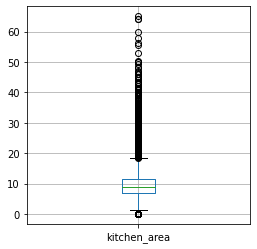

In [112]:
data_midclass['kitchen_area'].plot(kind = 'box', figsize = (4,4), grid = True)#статистические характеристики площади кухни

Среди величин жилой площади и кухни остались неправдоподобно маленькие значения. Они могли возникнуть из-за опечатки в количестве нулей, или если жилая площадь и кухня были заполнены в неправильном порядке. Проверить или восстановить данные не представляется возможным, поэтому удалим такие строки.

In [113]:
# удаляем объекты с жилой площадью менее 10
data_midclass = data_midclass.loc[(data_midclass['living_area']>10) | (data_midclass['living_area'].isna())]

In [114]:
# удаляем объекты с площадью кухни менее 5
data_midclass = data_midclass.loc[(data_midclass['kitchen_area']>5) | (data_midclass['living_area'].isna())]

### Столбец ceiling_height
Высота потолков обычно имеет стандартные значения в зависимости от серии дома. В таблице нет данных ни о годах строительства, ни о типе домов, поэтому будем отталкиваться от количества этажей в доме. Вычислим медианные значения высоты потолков для каждого типа дома и заполним ими пропуски, но сначала избавимся от выбросов в этом столбце

Выведем строки с объектами, где высота потолков превышает 5 м или менее 2 м. Слишком высокие значения, очевидно связаны со съехавшей запятой в дроби. Их можно исправить

In [115]:
data_midclass.query('ceiling_height>6 or ceiling_height<2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,short_locality_name
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3,53.0,2,True,...,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,Волхов
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.00,5,15.3,2,False,...,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0,Нурма
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9,30.0,2,True,...,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0,Санкт-Петербург
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5,19.5,1,True,...,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0,Санкт-Петербург
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5,30.0,3,True,...,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0,Мины
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.00,9,21.3,3,True,...,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267.0,Санкт-Петербург
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2,27.5,1,True,...,0,городской посёлок Мга,NaN,NaN,0,NaN,0,NaN,248.0,Мга
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36,41.0,13,True,...,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,Санкт-Петербург
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.30,16,19.3,14,True,...,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14.0,Санкт-Петербург
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.00,5,31.3,5,True,...,0,Кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN,Кронштадт


In [116]:
# разделим на 10 все выделяющиеся значения
data_midclass.loc[data_midclass['ceiling_height']>6 , 'ceiling_height'] = data_midclass['ceiling_height'] / 10

In [117]:
# оставим только объекты с высотой потолков от 2 до 5 метров или с пропусками
data_midclass = data_midclass.loc[((data_midclass['ceiling_height']>2)&(data_midclass['ceiling_height']<5)) | (data_midclass['ceiling_height'].isna())]

In [118]:
#заполняем пропуски медианой по домам разной этажности
for floors in data_midclass['floors_total'].unique():
    data_midclass['ceiling_height'] = data_midclass['ceiling_height'].fillna(data_midclass.loc[data_midclass['floors_total'] == floors, 'ceiling_height'].median())

### Столбец airports_nearest
В соответствии с идеей из прошлого пункта, заполним пропуски в расстояниях до ближайшего аэропорта усреднёнными значениями по каждому населённому пункту. По гистограмме видно, что в данных нет выбросов, все значения правдоподобны.
Здесь и далее пропуски в необязательных параметрах вероятнее всего связаны с тем, что пользователи не считают нужным их заполнять, если они не указывают на явные преимущества объекта недвижимости.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

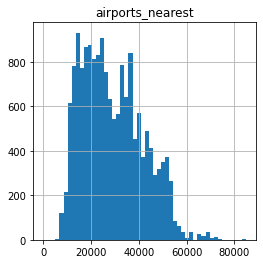

In [119]:
data_midclass.hist('airports_nearest', bins = 50, figsize = (4,4))

In [120]:
# заполняем пропуски медианой по каждому населенному пункту
for local_name in data_midclass['short_locality_name']:
    data_midclass['airports_nearest'] = data_midclass['airports_nearest'].fillna(data_midclass.loc[data_midclass['short_locality_name'] == local_name, 'airports_nearest'].median())

### Столбец parks_nearest
Чтобы заполнить колонку parks_nearest возьмём средние значения в зависимости от количества парков parks_around3000. Для случая, когда парков близко нет, значение в таблице выглядит достаточно неправдоподобным, чтобы заполнять им все пропуски. Поэтому поставим значение в 5000 метров, так как в абсолютном большинстве населенных пунктов парк или лес в радиусе 5 км всегда найдётся.

In [121]:
data_midclass.pivot_table(index = 'parks_around3000', values = 'parks_nearest', aggfunc = 'median')

,parks_nearest
parks_around3000,
0,3127.0
1,502.0
2,371.0
3,304.0


In [122]:
# заполняем пропуски медианными значениями для каждого количества парков в отдельности
for parks in range(1,3):
    data_midclass['parks_nearest'] = data_midclass['parks_nearest'].fillna(data_midclass.loc[data['parks_around3000'] == parks, 'parks_nearest'].median())
data_midclass.loc[data_midclass['parks_around3000'] == 0, 'parks_nearest'] = 5000

### Столбец ponds_nearest
Пруды встречаются в населённых пунктах гораздо реже, чем парки. Поэтому отсутствие данных о прудах вероятнее всего говорит о том, что в ближайшем окружении их нет. В сводной таблице средних расстояний видно,что те объекты, где наличие пруда в окрестности равно 0, не имеют в графе ponds_nearest никаких значений. Оставим эти пропуски незаполненными.

In [123]:
data_midclass.pivot_table(index = 'ponds_around3000', values = 'ponds_nearest', aggfunc = 'median')


,ponds_nearest
ponds_around3000,
1,595.0
2,439.0
3,311.0


### Столбец cityCenters_nearest
Расстояние до центра города для небольших населенных пунктов заполним медианным значением. Если такие пропуски есть для Санкт-Петербурга, их лучше оставить незаполненными, так как для большого города расстояние до центра имеет принципиальное значение и недостоверные данные могут исказить общую статистику.

In [124]:
#заполняем пропуски медианными значениями для каждого населенного пункта, кроме Санкт-Петербурга
for local_name in data_midclass['short_locality_name']:
    if local_name != 'Санкт-Петербург':
        data_midclass['cityCenters_nearest'] = data_midclass['cityCenters_nearest'].fillna(data_midclass.loc[data['short_locality_name'] == local_name, 'cityCenters_nearest'].median())

### Столбцы first_day_exposition и days_exposition
В столбце  first_day_exposition нет пробелов, но его необходимо привести к формату datetime.
В days_exposition довольно много пробелов, которые не представляется возможным заполнить - данные есть только о начале публикации, но никаких отметок, указывающих на дату продажи, в датасете нет. Эти пробелы могут быть объяснены тем, что квартира до сих пор выставлена на продажу, либо объявление не было вовремя снято. Также возможны сбои передачи данных с сайтов.

In [125]:
# переводим столбец в формат datetime
data_midclass.loc[:, 'first_day_exposition'] = pd.to_datetime(data_midclass.loc[:, 'first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

### Заключительный анализ предобработки данных

Сбросим индексы старого датасета. Проверим, остались ли явные дубликаты в таблице, чтобы удалить их при необходимости. Выведем первые 10 строк таблицы data_midclass, которая будет использоваться для дальнейшей обработки. Проверим оставшиеся пропуски.

In [126]:
data_midclass = data_midclass.reset_index(drop = True) # сбрасываем индексы
data_midclass.duplicated().sum() # считаем количество явных дубликатов

0

In [127]:
data_midclass.head() #очищенный датасет с заполннеными по возможности пропусками

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,short_locality_name
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,2.7,11,18.6,1,True,...,2,посёлок Шушары,12817.0,18603.0,0,5000.0,0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург
3,10,2890000.0,30.4,2018-09-10,1,2.7,12,14.4,5,True,...,0,городской посёлок Янино-1,26980.0,24213.0,0,5000.0,0,NaN,55.0,Янино-1
4,6,3700000.0,37.3,2017-11-02,1,2.7,26,10.6,6,True,...,1,посёлок Парголово,52996.0,19143.0,0,5000.0,0,NaN,155.0,Парголово


In [128]:
data_midclass.isna().sum() # оставшиеся пропуски в очищенном датасете

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1815
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1402
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest           13567
days_exposition          2860
short_locality_name         0
dtype: int64

## Добавление вспомогательных столбцов для анализа

Добавим в таблицу следующие столбцы с дополнительными параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [129]:
#стоимость квадратного метра
data_midclass['price_per_metre'] =  (data_midclass['last_price'] / data_midclass ['total_area']).round(0)
# день недели размещения объявления
data_midclass['week_day'] = data_midclass['first_day_exposition'].dt.weekday
# месяц размещения 
data_midclass['month'] = data_midclass['first_day_exposition'].dt.month
# год размещения
data_midclass['year'] = data_midclass['first_day_exposition'].dt.year
# расстояние до центра в км
data_midclass['city_center_km'] = (data_midclass['cityCenters_nearest']/1000).round(0)

In [130]:
# функция для разделения этажей на первые/последние
def floor_type(floor, floors_total):
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

In [131]:
# тип этажа
data_midclass['floor_type'] = data_midclass.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis = 1)

In [132]:
data_midclass.head(5) # датасет с новыми столбцами

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,short_locality_name,price_per_metre,week_day,month,year,city_center_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,True,...,2,755.0,NaN,Санкт-Петербург,120370.0,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,2.7,11,18.6,1,True,...,0,NaN,81.0,Шушары,82921.0,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,True,...,2,574.0,558.0,Санкт-Петербург,92786.0,3,8,2015,14.0,другой
3,10,2890000.0,30.4,2018-09-10,1,2.7,12,14.4,5,True,...,0,NaN,55.0,Янино-1,95066.0,0,9,2018,24.0,другой
4,6,3700000.0,37.3,2017-11-02,1,2.7,26,10.6,6,True,...,0,NaN,155.0,Парголово,99196.0,3,11,2017,19.0,другой


## Исследовательский анализ данных

### Общий анализ
Построим и проанализируем гистограммы(для непрерывных) и столбчатые диаграммы(для дискретных) параметров. По ним можно сделать следующие выводы(подробнее см.ниже): 

 - Пользовательские  характеристики(площади, стоимость) имеют ожидаемую форму распределения со смещенным влево максимумом. 
 - Картографические - имеют пики в зависимости от расположения самого крупного населённого пункта в подборке - Санкт-Петербурга.
 -Расстояние до парков имеет искуственный пик из-за специфики выбранного способа заполнения пропусков
 - Высота потолков и этажность в домах обусловлена типовым строительством.
 - Календарные параметры подчиняются рыночным законам: большая активность по будням и в осенний/весенний периоды

#### Общая площадь

Максимум функции распределения приходится на самый популярный в спальных районах размер квартир - 30-60 м2. Средняя величина практически не отличается от медианной - 52 и 57 м2. 25% приходится на жильё более высокого класса - от 70 до 300 м2.

In [133]:
data_midclass['total_area'].describe()

count    21809.000000
mean        57.935807
std         24.955455
min         13.000000
25%         40.400000
50%         52.000000
75%         68.600000
max        281.100000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

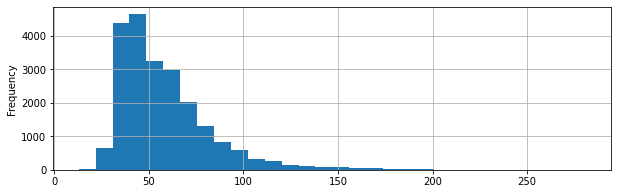

In [134]:
data_midclass['total_area'].plot(kind = 'hist', bins = 30, figsize = (10,3), grid = True)

#### Жилая площадь
Жилая площадь имеет бимодальное распределение, связанное с тем, что имеется разрыв в данных между квартирами с разным количеством комнат. Первый пик приходится вероятнее всего на однокомнатные квартиры с жилой площадью около 20 м2, второй - на двухкомнатные с площадью около 30. Среднее и медиана имеют близкое значение 30-33 м2. 

In [135]:
data_midclass['living_area'].describe()

count    19994.000000
mean        33.168854
std         16.943989
min         10.080000
25%         18.700000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

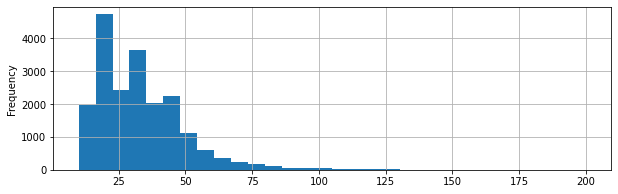

In [136]:
data_midclass['living_area'].plot(kind = 'hist', bins = 30, figsize = (10,3), grid = True)

#### Площадь кухни
Имеет распределение с максимумом на уровне медианы - около 9 м2. 75% значений укладываются в рамки стандартных планировок до 12 м2. Стоит отметить, что 1400 объектов не вошли в статистику из-за пропущенных значений. Это могут быть квартиры без выделенных кухонь, в таком случае в районе 0 можно было бы наблюдать ещё один пик. Среднее значение чуть больше медианы за счёт присутствия 25% довольно больших значений вплоть до 65 м2.

In [137]:
data_midclass['kitchen_area'].describe()

count    20407.000000
mean        10.292936
std          4.774042
min          4.000000
25%          7.100000
50%          9.100000
75%         11.800000
max         65.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

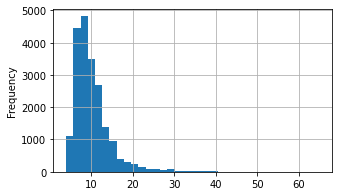

In [138]:
data_midclass['kitchen_area'].plot(kind = 'hist', bins = 35, figsize = (5,3), grid = True)

#### Цена объекта

Имеет наиболее близкое к нормальному распределение с максимумом в районе медианы - 4.6 млн рублей. Средняя цена отличается почти на миллион. Напомним, что в выборку включены только квартиры стоимостью до 30 млн, в оригинальном датасете смещение было бы значительно большим.

In [139]:
data_midclass['last_price'].describe()

count    2.180900e+04
mean     5.692773e+06
std      3.789074e+06
min      4.300000e+05
25%      3.499000e+06
50%      4.650000e+06
75%      6.650000e+06
max      2.999900e+07
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

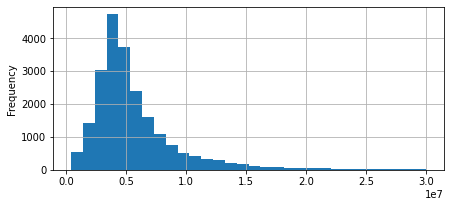

In [140]:
data_midclass['last_price'].plot(kind = 'hist', bins = 30, figsize = (7,3), grid = True)

#### Количество комнат\

Наиболее популярные на рынке - одно- и двухкомнатные квартиры, их примерно по 7500. Многокомнатных(5 и 6) квартир на порядок меньше. Из выборки были исключены все объекты более 6 комнат.

<AxesSubplot:xlabel='rooms'>

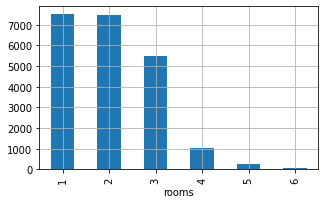

In [141]:
data_midclass.groupby('rooms')['rooms'].count().plot(kind = 'bar',  figsize = (5,3), grid = True)

#### Высота потолков
Самая распространённая в российском строительстве высота потолков - 2.7 метра. Варьируется чаще всего не более чем на 0.5 метра. Однако в Санкт-Петербурге сохранилось много дореволюционной застройки с высотой потолков вплоть до 5 метров. Значения выше этого были отбракованы.

In [142]:
data_midclass['ceiling_height'].describe()

count    21809.000000
mean         2.709036
std          0.201420
min          2.250000
25%          2.600000
50%          2.700000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

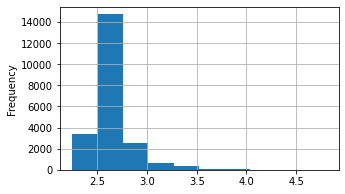

In [143]:
data_midclass['ceiling_height'].plot(kind = 'hist', bins = 10, figsize = (5,3), grid = True)

#### Этаж квартиры

Больше всего в российских городах пятиэтажных домов, соответственно и в продаже можно обнаружить в основном квартиры на 1-5 этажах. Чуть меньше - девятиэтажных домов. Однако в последние 20 лет активно развивается многоэтажное строительство, о чём говорит максимальное значение в выборке - 33 этаж.

In [144]:
data_midclass['floor'].describe()

count    21809.000000
mean         5.909670
std          4.881774
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:xlabel='floor'>

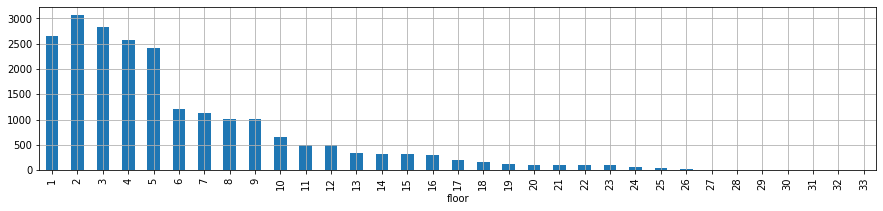

In [145]:
data_midclass.groupby('floor')['floor'].count().plot(kind = 'bar',  figsize = (15,3), grid = True)

#### Тип этажа квартиры («первый», «последний», «другой»)

In [146]:
data_midclass['floor_type'].describe()

count      21809
unique         3
top       другой
freq       16083
Name: floor_type, dtype: object

<AxesSubplot:xlabel='floor_type'>

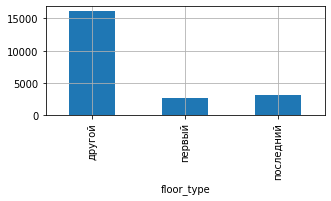

In [147]:
data_midclass.groupby('floor_type')['floor_type'].count().plot(kind = 'bar',  figsize = (5,2), grid = True)

#### Общее количество этажей в доме

Самые распространённые в выборке - 5 и 9 этажные дома. Весомую долю также составляют типовые 16 и 25 этажные дома, а также старинная малоэтажная застройка.

In [148]:
data_midclass['floors_total'].describe()

count    21809.000000
mean        10.746527
std          6.576253
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:xlabel='floors_total'>

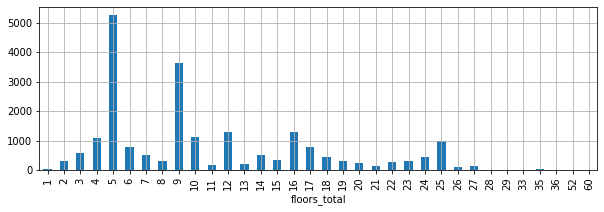

In [149]:
data_midclass.groupby('floors_total')['floors_total'].count().plot(kind = 'bar',  figsize = (10,3), grid = True)

#### Расстояние до центра города в метрах

Распределение имеет два пика - первый приходится на старые спальные районы в 10-15 км от центра. Второй - на окраину города, где идёт активная застройка(расстояние от центра до границ Санкт-Петербурга около 27-29 км). За пределами этого пика - пригородное жильё в малых населенных пунктах.

In [150]:
data_midclass['cityCenters_nearest'].describe()

count    21809.000000
mean     16611.994727
std       8490.140878
min        208.000000
25%      11133.000000
50%      15033.000000
75%      24213.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

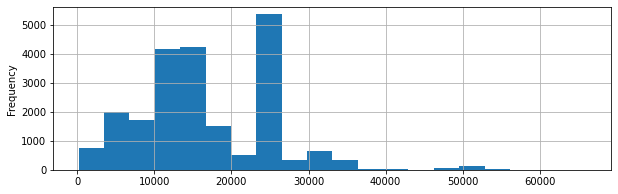

In [151]:
data_midclass['cityCenters_nearest'].plot(kind = 'hist', bins = 20, figsize = (10,3), grid = True)

#### Расстояние до ближайшего аэропорта

Этот столбец изначально имел большое количество пропусков, которые были заполнены усредненным значением. Отсюда внушительный максимум на 28 км - это медианное расстояние до аэропорта по Санкт-Петербургу. Наиболее удалённые населенные пункты достигают 80 км до ближайшего аэропорта.

In [152]:
data_midclass['airports_nearest'].describe()

count    21809.000000
mean     28433.224311
std      11145.693316
min          0.000000
25%      20977.000000
50%      26980.000000
75%      34636.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

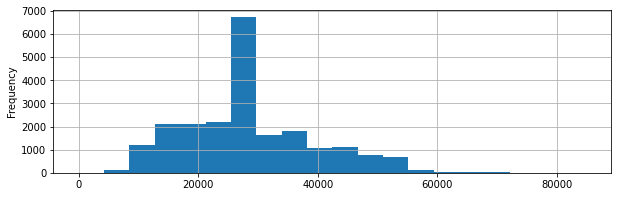

In [153]:
data_midclass['airports_nearest'].plot(kind = 'hist', bins = 20, figsize = (10, 3), grid = True)

#### Расстояние до ближайшего парка

Максимум на 5000 метрах условный - он возник после заполнения пропусков и обозначает количество квартир, где нет парка в шаговой доступности. Чаще собственники указывают в объявлениях парк, если он находится в радиусе не более 1 км.

In [154]:
data_midclass['parks_nearest'].describe()

count    21809.000000
mean      3488.513320
std       2136.925301
min          1.000000
25%        612.000000
50%       5000.000000
75%       5000.000000
max       5000.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

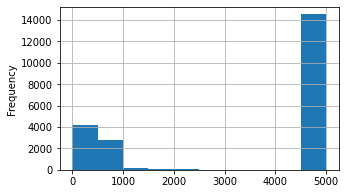

In [155]:
data_midclass['parks_nearest'].plot(kind = 'hist', bins = 10, figsize = (5, 3), grid = True)

#### День и месяц публикации объявления.

По будням публикуется больше объявлений, чем по выходным. Наиболее горячие месяцы на рынке недвижимости приходятся на весну и осень.

In [156]:
data_midclass['month'].describe()

count    21809.000000
mean         6.403366
std          3.493683
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

<AxesSubplot:xlabel='month'>

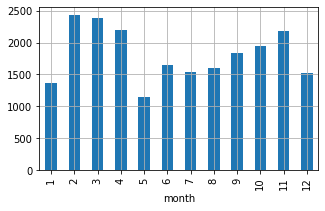

In [157]:
data_midclass.groupby('month')['month'].count().plot(kind = 'bar',  figsize = (5, 3), grid = True)

In [158]:
data_midclass['week_day'].describe()

count    21809.000000
mean         2.571095
std          1.790474
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day, dtype: float64

<AxesSubplot:xlabel='week_day'>

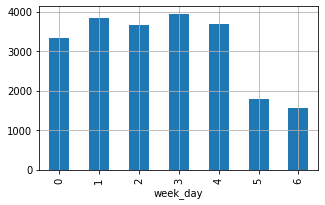

In [159]:
data_midclass.groupby('week_day')['week_day'].count().plot(kind = 'bar',  figsize = (5, 3), grid = True)

### Анализ скорости продажи квартир

Проанализируем скорость продажи квартир на рынке. Медианное значение - около трёх месяцев, при этом среднее - почти 6. Такая разница в значениях возникает из-за того, что некоторые объекты выставляются до 5 лет. При этом 75% процентов выставленных квартир были проданы в течение 8 месяцев. 


In [160]:
data_midclass['days_exposition'].describe()

count    18949.000000
mean       179.485725
std        217.949255
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

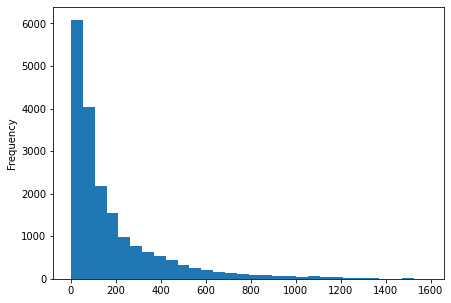

In [161]:
data_midclass['days_exposition'].plot(kind = 'hist', bins = 30, figsize = (7, 5))

In [162]:
data_midclass.sort_values(by = 'days_exposition', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,short_locality_name,price_per_metre,week_day,month,year,city_center_km,floor_type
17355,11,3500000.0,48.20,2014-12-15,2,2.50,5,27.40,2,True,...,0,NaN,1580.0,Новое Девяткино,72614.0,0,12,2014,24.0,другой
8774,11,10600000.0,80.00,2014-12-09,3,2.85,17,44.00,9,True,...,0,NaN,1553.0,Санкт-Петербург,132500.0,1,12,2014,17.0,другой
1726,2,13300000.0,79.60,2014-12-09,2,3.00,8,42.70,7,True,...,0,NaN,1513.0,Санкт-Петербург,167085.0,1,12,2014,11.0,другой
19304,18,13300000.0,133.00,2015-02-11,4,3.00,5,58.00,2,True,...,1,534.0,1512.0,Санкт-Петербург,100000.0,2,2,2015,5.0,другой
6124,3,4400000.0,42.98,2014-12-12,1,2.70,5,18.72,1,True,...,3,232.0,1512.0,Пушкин,102373.0,4,12,2014,30.0,первый
12963,7,9500000.0,100.00,2015-02-19,4,3.00,5,76.00,5,True,...,0,NaN,1497.0,Санкт-Петербург,95000.0,3,2,2015,5.0,последний
14093,1,9278000.0,139.80,2014-12-28,4,2.80,5,NaN,4,True,...,0,NaN,1489.0,Сестрорецк,66366.0,6,12,2014,36.0,другой
17612,9,5990000.0,82.00,2015-02-19,3,3.00,4,60.00,2,True,...,2,458.0,1485.0,Павловск,73049.0,3,2,2015,35.0,другой
10992,4,11400000.0,76.00,2014-12-09,2,2.70,9,36.00,3,True,...,0,NaN,1484.0,Санкт-Петербург,150000.0,1,12,2014,11.0,другой
4341,11,6650000.0,68.30,2015-02-19,4,2.63,5,45.10,4,True,...,3,453.0,1477.0,Санкт-Петербург,97365.0,3,2,2015,2.0,другой


In [163]:
data_midclass.sort_values(by = 'days_exposition').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,short_locality_name,price_per_metre,week_day,month,year,city_center_km,floor_type
1498,19,4000000.0,49.9,2019-05-01,2,2.50,9,25.0,1,True,...,1,681.0,1.0,Санкт-Петербург,80160.0,2,5,2019,14.0,первый
14777,4,4070000.0,45.1,2019-04-30,2,2.70,5,22.7,3,True,...,0,NaN,2.0,Санкт-Петербург,90244.0,1,4,2019,12.0,другой
12007,20,6100000.0,51.4,2019-04-29,2,3.00,5,31.7,4,True,...,0,NaN,2.0,Санкт-Петербург,118677.0,0,4,2019,9.0,другой
14923,0,7806000.0,25.0,2019-04-30,1,3.00,5,NaN,5,False,...,0,NaN,2.0,Санкт-Петербург,312240.0,1,4,2019,10.0,последний
8929,0,7740000.0,59.0,2018-08-31,2,2.70,6,28.0,4,True,...,0,NaN,3.0,Санкт-Петербург,131186.0,4,8,2018,5.0,другой
12696,12,4600000.0,38.0,2017-12-02,1,2.75,25,14.0,3,True,...,0,NaN,3.0,Санкт-Петербург,121053.0,5,12,2017,13.0,другой
3525,8,5200000.0,56.0,2019-03-16,2,2.70,18,NaN,6,False,...,0,NaN,3.0,Металлострой,92857.0,5,3,2019,27.0,другой
18130,9,5600000.0,48.0,2019-04-11,1,2.80,25,25.0,13,True,...,0,NaN,3.0,Санкт-Петербург,116667.0,3,4,2019,17.0,другой
15253,20,5000000.0,38.9,2018-12-10,1,2.60,25,17.4,14,True,...,1,392.0,3.0,Санкт-Петербург,128535.0,0,12,2018,14.0,другой
12683,0,3100000.0,45.0,2018-07-24,1,2.70,18,19.0,5,True,...,1,871.0,3.0,Санкт-Петербург,68889.0,1,7,2018,11.0,другой


**Вывод** Посмотрим на топ-10 самых быстрых и самых долгих продаж. Дольше других обычно продаются дорогие квартиры, либо, наоборот, дешевые - в плохом состоянии или в отдалённых районах. Быстрее других уходят хорошие квартиры в центре, либо недорогие в спальных районах. Но для полноценной проверки этих гипотез в выборке недостаточно характеристик

### Анализ зависимости стоимости объектов

Проанализируем факторы, влияющие на общую стоимость объекта. Сначала рассчитаем коэффициент корреляции Пирсона для всей таблицы, нас будет интересовать только столбец last_price. 
Затем построим диаграммы рассеяния и графики распределения параметров по различным категориям цен


In [164]:
corr_table = data_midclass.corr()
corr_table['last_price'] # коэффициент корреляции для общей стоимости объекта

total_images           0.155732
last_price             1.000000
total_area             0.779075
rooms                  0.507645
ceiling_height         0.416105
floors_total           0.092182
living_area            0.670883
floor                  0.086002
is_apartment          -0.011647
studio                      NaN
open_plan             -0.007830
kitchen_area           0.588161
balcony                0.036702
airports_nearest      -0.005810
cityCenters_nearest   -0.459866
parks_around3000       0.285540
parks_nearest         -0.286908
ponds_around3000       0.303898
ponds_nearest         -0.100838
days_exposition        0.131190
price_per_metre        0.679569
week_day              -0.021889
month                  0.004548
year                  -0.036652
city_center_km        -0.458992
Name: last_price, dtype: float64

Построим диаграммы рассеяния непрерывных параметров - общей площади, жилой, цены за м2, размера кухни

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

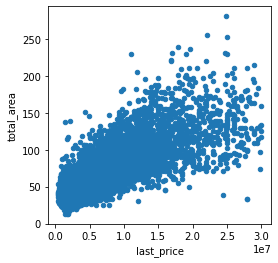

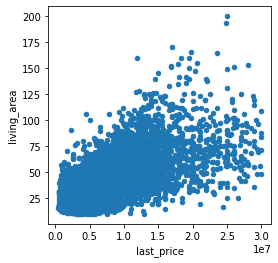

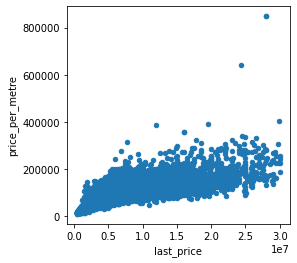

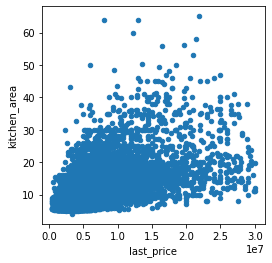

In [165]:
# зависимость цены от общей площади
data_midclass.plot(x='last_price', y='total_area', kind='scatter', figsize = (4,4))
# зависимость цены от жилой площади
data_midclass.plot(x='last_price', y='living_area', kind='scatter', figsize = (4,4))
# зависимость цены от стоимости одного квадратного метра
data_midclass.plot(x='last_price', y='price_per_metre', kind='scatter', figsize = (4,4))
# зависимость цены от площади кухни
data_midclass.plot(x='last_price', y='kitchen_area', kind='scatter', figsize = (4,4))

Для категориальных переменных(год, месяц, день недели, тип этажа) построим графики изменения средней цены квадратного метра

<AxesSubplot:xlabel='year'>

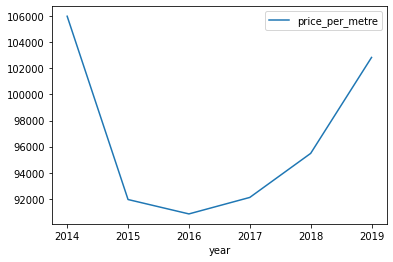

In [166]:
data_midclass.pivot_table(index = 'year', values = 'price_per_metre', aggfunc = 'median').plot()

<AxesSubplot:xlabel='month'>

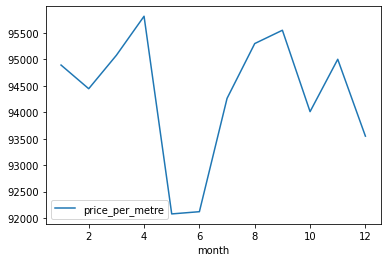

In [167]:
data_midclass.pivot_table(index = 'month', values = 'price_per_metre', aggfunc = 'median').plot()

<AxesSubplot:xlabel='week_day'>

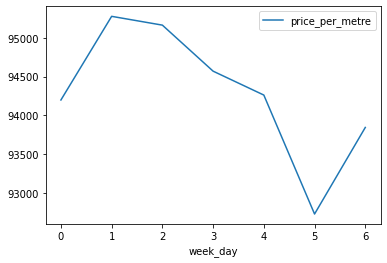

In [168]:
data_midclass.pivot_table(index = 'week_day', values = 'price_per_metre', aggfunc = 'median').plot()

<AxesSubplot:xlabel='floor_type'>

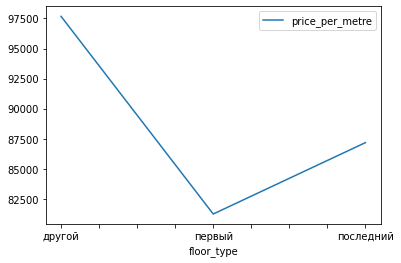

In [169]:
data_midclass.pivot_table(index = 'floor_type', values = 'price_per_metre', aggfunc = 'median').plot()

**Вывод** Наиболее устойчивую корреляцию по этим значениям показывает общая площадь.  Чуть меньше - жилая и количество комнат. Относительная корреляция есть с площадью кухни, количеством комнат, расстоянием до центра. Этажность дома, тип этажа, дата размещения объявления на стоимость квартиры не имеют линейной корреляции со стоимостью квартиры. 
По графикам средней стоимости квадратного метра можно заметить, что квартиры на первом этаже имеют стоимость в среднем на 20 тысяч меньше, чем на остальных. Стоит отметить, что здесь нужно учитывать большое количество загородной недвижимости в выборке, которая чаще имеет 1-2 этажную застройку. 
По году размещения стоимость имеет значительный спад на 15000 во время экономического кризиса 2015-2016гг, но почти выходит на прежний уровень цен к 2019.
В месяцах и днях недели прослеживается тенденция рынка к колебаниям - спад летом и по выходным, подъём в весенне-осенний период и по будням.


### Стоимость квадратного метра в различных населенных пунктах
 
Проанализируем 10 населённых пунктов с наибольшим количеством объявлений, для этого составим дополнительную таблицу с количеством объявлений и средней ценой за квадратный метр.

In [170]:
#создадим таблицу с топ-10 объявлений
big_town = data_midclass.groupby('short_locality_name')['last_price'].count().sort_values(ascending = False).head(10)
big_town = big_town.to_frame()
big_town

,last_price
short_locality_name,
Санкт-Петербург,14474
Мурино,513
Кудрово,421
Шушары,418
Всеволожск,378
Колпино,321
Пушкин,321
Парголово,312
Гатчина,277


In [171]:
#создадим таблицу средних цен по населённому пункту
mean_price = data_midclass.groupby('short_locality_name')['price_per_metre'].mean().round(0)
mean_price = mean_price.to_frame()
mean_price.head()

,price_per_metre
short_locality_name,
unknown,93241.0
Агалатово,71215.0
Александровская,70262.0
Алексеевка,22222.0
Аннино,63586.0


In [172]:
big_town.join(mean_price, how = 'inner') #объединим таблицы

,last_price,price_per_metre
short_locality_name,,
Санкт-Петербург,14474,110089.0
Мурино,513,84821.0
Кудрово,421,94793.0
Шушары,418,78415.0
Всеволожск,378,68929.0
Колпино,321,75280.0
Пушкин,321,102976.0
Парголово,312,90517.0
Гатчина,277,69266.0


**Вывод** Самым дорогим населённым пунктом ожидаемо является Санкт-Петербург, но Пушкин отстаёт менее чем на 10%. Это может быть связано с тем, что в популярных туристических направлениях часто покупают квартиры под апартаменты. 
Самая недорогая недвижимость из представленных в таблице городов - в Выборге. Хотя это тоже туристический город, сказывается сильная удалённость от Санкт-Петербурга.

### Стоимость квартир в Санкт-Петербурге

Выясним, как меняется стоимость квадратного метра при удалении от центра города. Для этого составим вспомогательную таблицу с данными только по Санкт-Петербургу и построим графики зависимости медианной и средней цены от расстояния. 
На этих графиках прослеживается общий тренд снижения цены при удаления от центра, однако есть локальные максимумы, связанные с тем, что в спальных и отдалённых районах активно ведется застройка новостройками разного класса, в том числе элитного. В то же время в центре может присутствовать ветхое бывшее коммунальное жилье, которое имеет невысокую стоимость.

In [173]:
data_SP = data_midclass.query('short_locality_name == "Санкт-Петербург" and city_center_km>0').reset_index(drop = True)
data_SP.head() # таблица данных по Санкт-Петербургу

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,short_locality_name,price_per_metre,week_day,month,year,city_center_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2,755.0,NaN,Санкт-Петербург,120370.0,3,3,2019,16.0,другой
1,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,True,...,2,574.0,558.0,Санкт-Петербург,92786.0,3,8,2015,14.0,другой
2,5,7915000.0,71.6,2019-04-18,2,2.70,24,NaN,22,True,...,0,NaN,NaN,Санкт-Петербург,110545.0,3,4,2019,12.0,другой
3,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,0,NaN,289.0,Санкт-Петербург,88525.0,6,2,2017,15.0,другой
4,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,2,553.0,137.0,Санкт-Петербург,127525.0,3,11,2017,14.0,другой


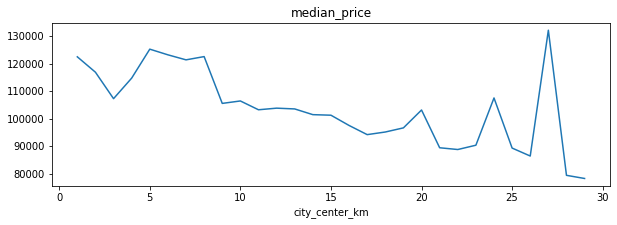

<AxesSubplot:title={'center':'mean_price'}, xlabel='city_center_km'>

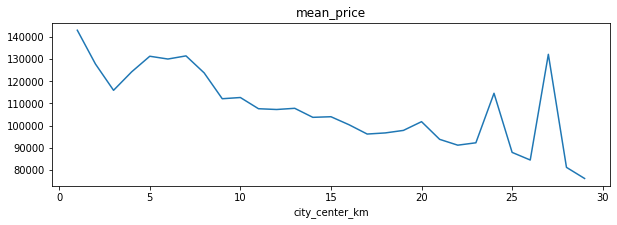

In [174]:
# графики зависимости средней стоимости от расстояния от центра
data_SP.groupby('city_center_km')['price_per_metre'].median().plot(title = 'median_price', figsize = (10, 3))
plt.show()
data_SP.groupby('city_center_km')['price_per_metre'].mean().plot(title = 'mean_price', figsize = (10, 3))

**Вывод** На этих графиках прослеживается общий тренд снижения цены при удаления от центра, однако есть локальные максимумы, 
связанные с тем, что в спальных и отдалённых районах активно ведется застройка новостройками разного класса, в том числе 
элитного. В то же время в центре может присутствовать ветхое бывшее коммунальное жилье, которое имеет невысокую стоимость.

## Общий вывод



Производилось исследование рынка недвижимости Санкт-Петербурга и Ленинградской области. Была проанализирована выборка 2014-2019 гг., содержащая изначально 23700 строк, после очистки и преобразования данных - 21800 с характеристиками по 29 категориям. Очистка проводилась с целью удаления бракованных данных и элитной недвижимости, чтобы не искажать средние значения по рынку. В результате для анализа оставили выборку из 1-6-комнатных квартир и загородную недвижимость площадью до 300 м2.
    Были изучены распределения и статистические свойства различных параметров - количественные, качественные и картографические характеристики недвижимости, а также даты и сроки публикации объявлений. 
     На рынке преобладают стандартные по площади и планировке 1-3х комнатные квартиры в 5 и 9 этажных домах, с высотой потолков 2.7 м, жилой площадью 20-30 м2 и площадью кухни до 12. При этом активно развивается рынок многоэтажных дорогостоящих новостроек на окраине города - ощутимую долю рынка составляют квартиры с большим метражом и в домах с 16-37 этажами. Остаётся также и дореволюционная малоэтажная застойка в центре Санкт-Петербурга с потолками до 4.5 метров. 
    Средняя стоимость квадратного метра в Санкт-Петербурге - 110 тыс руб. В целом по региону она варьируется от 55 до 110 тыс.руб. Самые дешевые квартиры из крупных городов Ленинградской области в Выборге, Всеволожске и Гатчине. Самый дорогой город области - Пушкин, там стоимость квартир почти не уступает петербургской.   
    На формирование окончательной стоимости объекта прямо пропорционально влияют его размеры и планировка(корреляция ~0.7). Расстояние от центра города имеет значение, но нелинейное, хотя в целом для обычных спальных районов имеется тренд к снижению стимости при отдалении от центра. Квартиры на первых и последних этажах в среднем на 15-20 тысяч за метр дешевле(без учета разделения на городскую и загородную недвижимость). В 2015-2016 гг. рынок переживал сильный спад(цена за метр упала примерно на 15 тыс руб), но стоимость почти вышла на докризисные значения к 2019 году. 
    Абсолютное большинство квартир продаётся в течение 9 месяцев, хотя есть случаи долгосрочных продаж до 5 лет и сверхбыстрых в течение нескольких дней. Наиболее активен рынок по будням и в весенне-осенний период, поэтому средняя стоимость в эти периоды возрастает по сравнению с выходными днями и летом соответственно.
    Так как в текущем варианте все параметры имеют очень большой размах, для более точного понимания структуры рынка выборку следует разбить на более узкие категории - загородная недвижимость, элитная, коммерческие апартаменты и т.д. и проанализировать по отдельности. Также желательно привлечь дополнительные параметры, которые обычно указывают в объявлении о продаже - косметическое состояние квартиры, точное местоположение по районам, близость к метро, наличие инфраструктуры.
  
